In [2]:
# Google mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Suppose the pictures and test folder are in Challenge_Suez
PATH = "/content/drive/MyDrive"
CHALLENGE_NAME = "/AI-meter-reading"
PATH_PROJECT = PATH + CHALLENGE_NAME
FOLDER_IMAGE_PATH = PATH_PROJECT + '/pictures'
%cd {PATH_PROJECT}

/content/drive/MyDrive/AI-meter-reading


PaddleOCR without training at all, and only with detection test

In [5]:
# Install PaddlePaddle (if not already installed)
!pip install paddlepaddle
!pip install paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.6/544.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.6 MB/s eta 0:0

What criterion can I use to select a text with bounding box among all the recognized text? Check for digit-only sequences. The length is not an invariant among all the images in the dataset.

In [75]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Read the image
def rotate_image_180(image_path):
    image = cv2.imread(img_path)

    # Rotate the image by 180 degrees
    rotated_image = cv2.rotate(image, cv2.ROTATE_180)
    return rotated_image


In [19]:
import re

# Define the regular expression pattern
pattern = r'^\d+$' # only digits

# Test strings
test_string1 = "123456"
test_string2 = "123abc"

# Check if the strings contain only digits
match1 = re.fullmatch(pattern, test_string1)
match2 = re.fullmatch(pattern, test_string2)

print(bool(match1))  # Output: True
print(bool(match2))  # Output: False


True
False


In [7]:
ocr = PaddleOCR(lang='en', rec_algorithm='CRNN')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:00<00:00, 7784.73it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:00<00:00, 18412.02it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:00<00:00, 6142.87it/s]

[2024/10/21 20:37:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='CRNN', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_di

In [80]:
def unpack_result(result):
    """
    Unpack the result text, box, and confidence, and return the most sensible one
    """
    # accept results if the length is 4 or 5 or 7 or 8, never 6 (risky)
    res_text = ''
    res_box = []
    res_confidence = 0
    if result[0] is not None:
        for line in result:
            for word_info in line:
                text = word_info[1][0]
                if re.fullmatch(pattern, text) and len(text) in [4, 5, 7, 8, 9]:
                    confidence = word_info[1][1]
                    if confidence > res_confidence:
                        res_text = text
                        res_box = word_info[0]
                        res_confidence = confidence
    return res_text, res_box, res_confidence


[2024/10/21 21:37:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 21:37:35] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.330733060836792
[2024/10/21 21:37:36] ppocr DEBUG: rec_res num  : 10, elapsed : 0.8338532447814941
Recognized text: 1200, Confidence: 0.7272768020629883, Rotatation: False


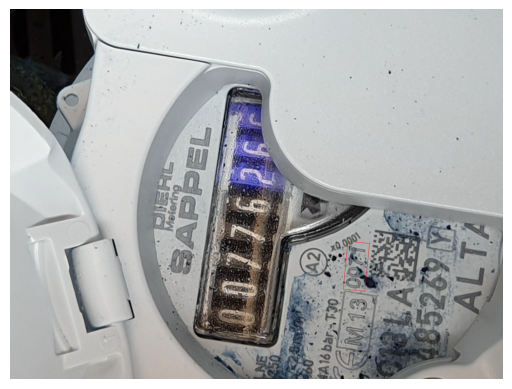

In [72]:
is_rotated = False
# Perform OCR with angle classification
result = ocr.ocr(img_path, cls=True)
if result[0] is not None:
    res_text, res_box, res_confidence = unpack_result(result)
    if len(res_text) == 0:
        # Perform OCR without angle classification
        is_rotated = True
        result = ocr.ocr(rotate_image_180(img_path), cls=True)
        res_text, res_box, res_confidence = unpack_result(result)

else:
    # Perform OCR with angle classification (rotated)
    is_rotated = True
    result = ocr.ocr(rotate_image_180(img_path), cls=True)
    res_text, res_box, res_confidence = unpack_result(result)


# Draw bounding box
# box = word_info[0]
# Load the image
if is_rotated:
    image = rotate_image_180(img_path)
else:
    image = cv2.imread(img_path)
box = np.reshape(np.array(res_box), [-1, 1, 2]).astype(np.int64)
image = cv2.polylines(np.array(image), [box], True, (255, 0, 0), 2)

# Display the image
print(f'Recognized text: {res_text}, Confidence: {res_confidence}, Rotation: {is_rotated}')
plt.imshow(image)
plt.axis('off')
plt.show()

[2024/10/21 22:30:19] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 22:30:19] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.2774958610534668
[2024/10/21 22:30:20] ppocr DEBUG: rec_res num  : 5, elapsed : 0.3666250705718994
Recognized text: INd, Confidence: 0.6062440276145935


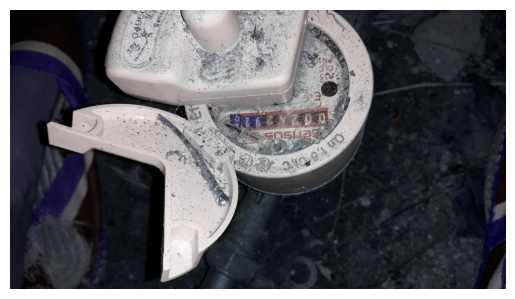

Recognized text: SASUPR, Confidence: 0.5098618865013123


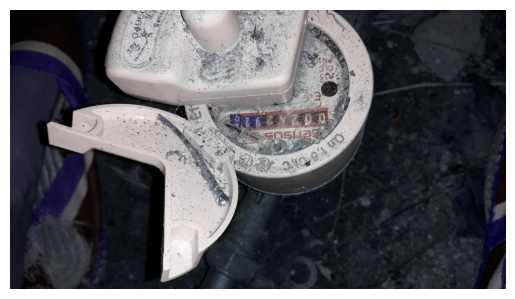

In [87]:
result = ocr.ocr(img_path, cls=True)
image_source = cv2.imread(img_path)
for line in result:
    for word_info in line:
        text = word_info[1][0]

        confidence = word_info[1][1]
        box = word_info[0]
        box = np.reshape(np.array(res_box), [-1, 1, 2]).astype(np.int64)
        image = cv2.polylines(np.array(image_source), [box], True, (255, 0, 0), 2)

        # Display the image
        print(f'Recognized text: {text}, Confidence: {confidence}')
        plt.imshow(image)
        plt.axis('off')
        plt.show()


[2024/10/21 22:32:36] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 22:32:36] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.1729414463043213
[2024/10/21 22:32:36] ppocr DEBUG: rec_res num  : 6, elapsed : 0.26694202423095703
Recognized text: ERSUS, Confidence: 0.831269383430481


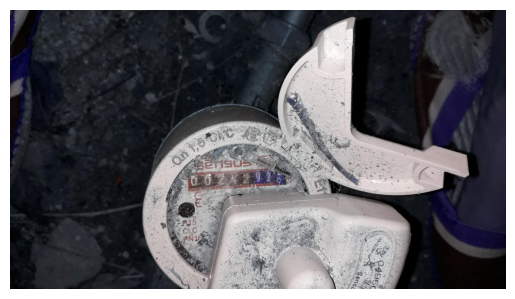

Recognized text: 00242928, Confidence: 0.7707059383392334


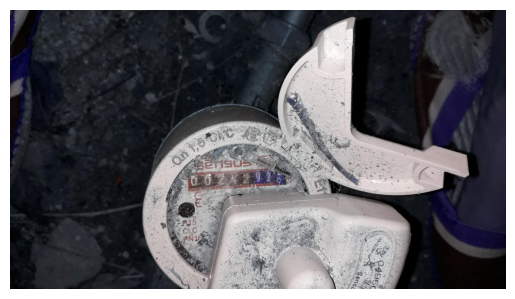

Recognized text: Rj5, Confidence: 0.8104791641235352


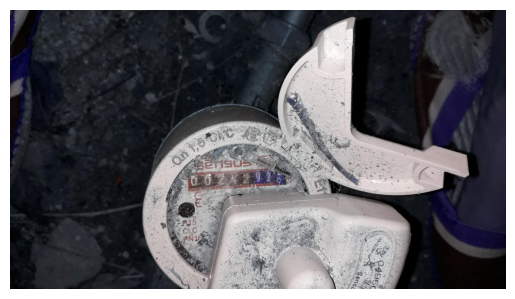

Recognized text: CLC, Confidence: 0.7542271018028259


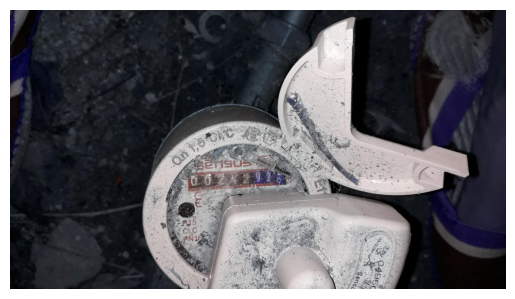

Recognized text: PN16., Confidence: 0.8134952783584595


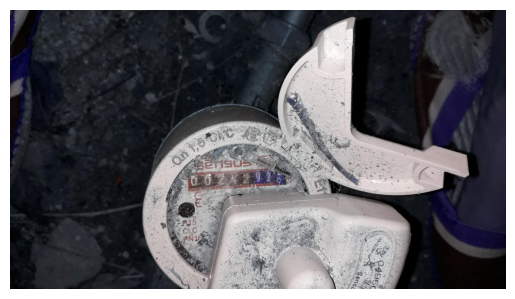

Recognized text: P49, Confidence: 0.7901031374931335


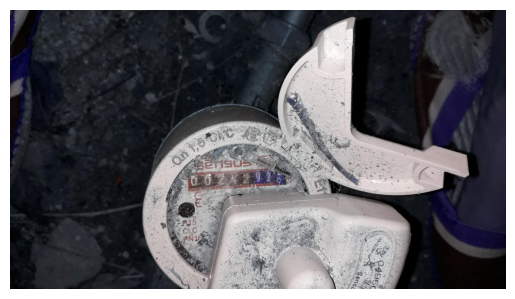

In [90]:
image_source = rotate_image_180(img_path)
result = ocr.ocr(image_source, cls=True)

for line in result:
    for word_info in line:
        text = word_info[1][0]

        confidence = word_info[1][1]
        box = word_info[0]
        box = np.reshape(np.array(res_box), [-1, 1, 2]).astype(np.int64)
        image = cv2.polylines(np.array(image_source), [box], True, (255, 0, 0), 2)

        # Display the image
        print(f'Recognized text: {text}, Confidence: {confidence}')
        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [77]:
import os

In [81]:
# streamlined OCR
preds = {'filename': [], 'index': []}
lst = os.listdir(FOLDER_IMAGE_PATH) # your directory path
n = len(lst)
for i, filename in enumerate(lst):
    print(f'Process Image {i+1} / {n}')
    img_path = os.path.join(FOLDER_IMAGE_PATH, filename)
    # Read the image
    is_rotated = False
    # Perform OCR with angle classification
    result = ocr.ocr(img_path, cls=True)
    res_text, res_box, res_confidence = unpack_result(result)
    if len(res_text) == 0:
        # Perform OCR without angle classification
        is_rotated = True
        result = ocr.ocr(rotate_image_180(img_path), cls=True)
        res_text, _, _ = unpack_result(result)

    else:
        # Perform OCR with angle classification (rotated)
        is_rotated = True
        result = ocr.ocr(rotate_image_180(img_path), cls=True)
        res_text, _, _ = unpack_result(result)

    preds['filename'].append(filename)
    preds['index'].append(res_text)




[2024/10/21 21:55:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 21:55:32] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.10784363746643066
[2024/10/21 21:55:33] ppocr DEBUG: rec_res num  : 11, elapsed : 0.467562198638916
[2024/10/21 21:55:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 21:55:33] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.10487985610961914
[2024/10/21 21:55:34] ppocr DEBUG: rec_res num  : 15, elapsed : 0.620574951171875
[2024/10/21 21:55:34] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/10/21 21:55:34] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.20598101615905762
[2024/10/21 21:55:35] ppocr DEBUG: rec_res num  : 14, elapsed : 0.6459832191467285
[2024/10/21 21:55:35] ppocr WARNING: Since the angle classifier is not initialized, it will not be used duri

In [82]:
df_preds = pd.DataFrame(preds)

In [84]:
df_preds

,filename,index
0,16b747.jpg,2018
1,35a882.jpg,70000000
2,a34a65.jpg,
3,861181.jpg,8110000
4,e78bf8.jpg,00010620
...,...,...
788,7c00b7.jpg,
789,8953ff.jpg,0296293
790,e5e2ed.jpg,
791,986f33.jpg,01266175


In [93]:
df_preds_index = df_preds.copy()

In [94]:
df_preds_index['index'] = df_preds_index['index'].str[:5]

In [96]:
df_preds_index.head()

,filename,index
0,16b747.jpg,2018
1,35a882.jpg,70000
2,a34a65.jpg,
3,861181.jpg,81100
4,e78bf8.jpg,00010


In [99]:
df_preds_index.rename(columns={'index': 'index_pred'}, inplace=True)

In [103]:
df_preds_index.index_pred = pd.to_numeric(df_preds_index.index_pred, errors='coerce')

In [108]:
df_preds_index.index_pred = df_preds_index.index_pred.fillna(0).astype('int')

In [109]:
df_preds_index

,filename,index_pred
0,16b747.jpg,2018
1,35a882.jpg,70000
2,a34a65.jpg,0
3,861181.jpg,81100
4,e78bf8.jpg,10
...,...,...
788,7c00b7.jpg,0
789,8953ff.jpg,2962
790,e5e2ed.jpg,0
791,986f33.jpg,1266


In [ ]:
df_preds.to_csv(PATH_PROJECT + '/preds.csv', index=False)

In [97]:
LABELS_FILE = PATH_PROJECT + '/index.csv'

In [98]:
labels_df = pd.read_csv(LABELS_FILE)

In [101]:
# rename labels column and add .jpg at the end
labels_df.rename(columns={'ID': 'filename'}, inplace=True)
labels_df['filename'] = labels_df['filename'] + '.jpg'

In [110]:
def accuracyModulo1000(test_labels, true_labels):
    """
    Compare two pandas dataframe corresponding to test and true labels
    """
    joint_labels_df = pd.merge(true_labels, test_labels, on='filename', how='inner')
    joint_labels_df['index_pred'].apply(np.ceil)
    return (joint_labels_df['index'] % 1000 == joint_labels_df['index_pred'] % 1000).mean()

In [111]:
print(f'Accuracy: {accuracyModulo1000(df_preds_index, labels_df)}')

Accuracy: 0.09079445145018916


# Custom training

In [ ]:
import os
import cv2
import numpy as np
from paddleocr import PaddleOCR, draw_ocr
from paddle.io import Dataset, DataLoader

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Custom dataset to load images
class ImageDataset(Dataset):
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.folder_path, self.image_files[idx])
        image = cv2.imread(img_path)
        return image, img_path

# Path to the folder containing images
dataset = ImageDataset(FOLDER_IMAGE_PATH)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)


[2024/10/21 16:17:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
from PIL import Image

In [ ]:
# Process each batch
for batch in dataloader:
    images, img_paths = batch
    for img, img_path in zip(images, img_paths):
        img = img.numpy()  # Convert tensor to numpy array
        result = ocr.ocr(img, cls=True)

        # Extract the boxes, texts, and scores
        boxes = [line[0] for line in result]
        txts = [line[1][0] for line in result]
        scores = [line[1][1] for line in result]

        # Draw results on the image
        image_with_boxes = draw_ocr(img, boxes, txts, scores)

        # Save the image with OCR results
        output_path = os.path.join(PATH_PROJECT + '/pictures_boxes', f'ocr_{os.path.basename(img_path)}')
        cv2.imwrite(output_path, image_with_boxes)

        # Optionally, print the results
        print(f'Results for {img_path}:')
        for line in result:
            print(line)

print("OCR processing completed for all images in the folder.")

[2024/10/21 16:19:26] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.20117735862731934
[2024/10/21 16:19:26] ppocr DEBUG: cls num  : 11, elapsed : 0.07338261604309082
[2024/10/21 16:19:27] ppocr DEBUG: rec_res num  : 11, elapsed : 1.1028127670288086


TypeError: '<' not supported between instances of 'tuple' and 'float'

In [ ]:
def stream_inference(self, source=None, model=None, **kwargs):
    """
    Streams real-time inference on camera feed (or other sources) and saves results.

    Args:
        source (str, optional): Path to video or image source (e.g., webcam id).
                                Defaults to None.
        model (PaddleOCR, optional): PaddleOCR model instance. Defaults to None.
        **kwargs: Additional keyword arguments for inference.
    """
    if self.verbose:
        print("")

    # Setup model
    if not self.model:
        self.setup_model(model)

    # Thread-safe inference
    with self._lock:
        # Set up source for each prediction call
        self.setup_source(source if source is not None else self.source)

        # Check if save directories exist
        if self.save or self.save_txt:
        (self.save_dir / "labels" if self.save_txt else self.save_dir).makedirs(exist_ok=True)

        # Warmup model
        if not self.done_warmup:
        self.model.warmup(imgsz=(1, 3, *self.imgsz))
        self.done_warmup = True

        self.seen, self.windows, self.batch = 0, [], None

        for frame in self.source:
        # Preprocess
        im = self.preprocess(frame)

        # Inference
        preds = self.inference(im, **kwargs)

        # Handle embedding output
        if self.embed:
            yield preds
            continue

        # Postprocess
        self.results = self.postprocess(preds, im)

        # Visualize, save, write results
        n = len(frame)
        for i in range(n):
            self.seen += 1
            self.results[i].update({"speed": {"inference": self.measure_inference_time()}})  # Example speed measurement
            if self.verbose or self.save or self.save_txt or self.show:
            self.write_results(i, frame, self.results[i])

        # Print batch results
        if self.verbose:
            print("\n".join(self.results))

        # Yield results
        yield self.results

    # Release resources
    for v in self.vid_writer.values():
        if isinstance(v, cv2.VideoWriter):
        v.release()

    # Print final results
    if self.verbose and self.seen:
        inference_time = self.measure_inference_time(average=True)
        print(f"Speed: {inference_time:.1f}ms inference per image")
        if self.save or self.save_txt or self.save_crop:
        num_labels = len(list(self.save_dir.glob("labels/*.txt")))
        save_text = f"\n{num_labels} label{'s' * (num_labels > 1)} saved to {self.save_dir / 'labels'}" if self.save_txt else ""
        print(f"Results saved to {self.save_dir}{save_text}")

# Example function to measure inference time (replace with your preferred method)
def measure_inference_time(self, average=False):
    # Implement your logic to measure inference time here (e.g., using Paddle's Profiler)
    # This is a placeholder to demonstrate the concept
    inference_time = 10.0  # Replace with actual measurement
    return inference_time if not average else self.inference_time / self.seen

    # ... other class methods for setup, processing, etc. (not shown here)

Let us train PaddleOCR!

See https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/dataset/ocr_datasets_en.md

he image annotation after json.dumps() encoding is a list containing multiple dictionaries:
```
ch4_test_images/img_61.jpg    [{"transcription": "MASA", "points": [[310, 104], [416, 141], [418, 216], [312, 179]]}, {...}]
```

The points in the dictionary represent the coordinates (x, y) of the four points of the text box, arranged clockwise from the point at the upper left corner.

transcription represents the text of the current text box. When its content is "###" it means that the text box is invalid and will be skipped during training.


Get the known annotation from Roboflow.



In [ ]:
!mkdir {HOME}/datasetsV2
%cd {HOME}/datasetsV2

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YPr8z8exI5EnxDegn87q")
project = rf.workspace("ai-meter-reading").project("ai-meter-reading")
version = project.version(2)
dataset = version.download("createml")

mkdir: cannot create directory ‘{HOME}/datasetsV2’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasetsV2'
/content/drive/MyDrive/AI-meter-reading
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ai-meter-reading-2 in createml:: 100%|██████████| 107/107 [00:02<00:00, 45.45it/s]


# Quickstart to PaddleOCR

In [ ]:
!pip install paddlepaddle-gpu

In [ ]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

In [ ]:
!git clone paddleOCR
!cd PaddleOCR/
# Download the pre-trained model of en_PP-OCRv4
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
# Decompress model parameters
!cd pretrain_models
!tar -xf en_PP-OCRv4_rec_train.tar && rm -rf en_PP-OCRv4_rec_train.tar

In [ ]:
# GPU training Support single card and multi-card training
# Training icdar15 English data and The training log will be automatically saved as train.log under "{save_model_dir}"

#specify the single card training(Long training time, not recommended)
!python3 tools/train.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model=en_PP-OCRv4_rec_train/best_accuracy

#specify the card number through --gpus
!python3 -m paddle.distributed.launch --gpus '0,1,2,3'  tools/train.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model=en_PP-OCRv4_rec_train/best_accuracy

# Remodel folder according to PaddleOCR dataset standards


Unnest JSON

In [ ]:
# utils
def xyxy_to_coordinates(width, height, xmin, ymin, xmax, ymax):
    """
    Convert xyxy to 4 coordinates (x, y) of bounding boxes arranged clockwise from the point at the upper left corner.
    """
    return [[xmin, ymax], [xmax, ymax], [xmax, ymin], [xmin, ymin]] # to take into account the width, height



def rewrite_to_json(file):
    """
    Rewrite the configuration dataset file to a suitable format for PaddleOCR training
    """

def write_results(filename, path):
    """
    Write the results of OCR inference to a CSV file (or text file)
    """
    with open(path, 'w', newline='') as file:
    writer = csv.writer(filename)
    for row in result:
        csv_row= []
        for row0 in row[0]:
            csv_row.append(row0[0])
            csv_row.append(row0[1])
        csv_row.append(row[1][0])
        writer.writerow(csv_row)


In [ ]:
import paddle
from paddleocr import PaddleOCR, draw_ocr

# Initialize PaddleOCR with the desired model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # You can change the language as needed

# Define your training dataset
train_dataset = 'path/to/your/train/dataset'
val_dataset = 'path/to/your/validation/dataset'

# Define the training configuration
config = {
    'Global': {
        'use_gpu': True,
        'epoch_num': 100,
        'log_smooth_window': 20,
        'print_batch_step': 10,
        'save_model_dir': './output/rec',
        'save_epoch_step': 3,
        'eval_batch_step': [0, 2000],
        'train_batch_size_per_card': 8,
        'test_batch_size_per_card': 8,
        'image_shape': [3, 32, 320],
        'max_text_length': 25,
        'character_type': 'en',
        'character_dict_path': None,
        'loss_type': 'ctc',
        'optimizer': {
            'name': 'Adam',
            'beta1': 0.9,
            'beta2': 0.999,
            'lr': 0.001,
        },
    },
    'Train': {
        'dataset': train_dataset,
        'loader': {
            'shuffle': True,
            'batch_size': 8,
            'num_workers': 4,
        },
    },
    'Eval': {
        'dataset': val_dataset,
        'loader': {
            'shuffle': False,
            'batch_size': 8,
            'num_workers': 4,
        },
    },
}

# Start training
ocr.train(config)